Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3481 - val_loss: 0.1963
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1856 - val_loss: 0.1629
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1584 - val_loss: 0.1464
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1436 - val_loss: 0.1360
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1337 - val_loss: 0.1300
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1282 - val_loss: 0.1261
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1248 - val_loss: 0.1234
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1221 - val_loss: 0.1216
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1203 - val_loss: 0.1201
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1188 - val_loss: 0.1190
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1178 - val_loss: 0.1181
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 

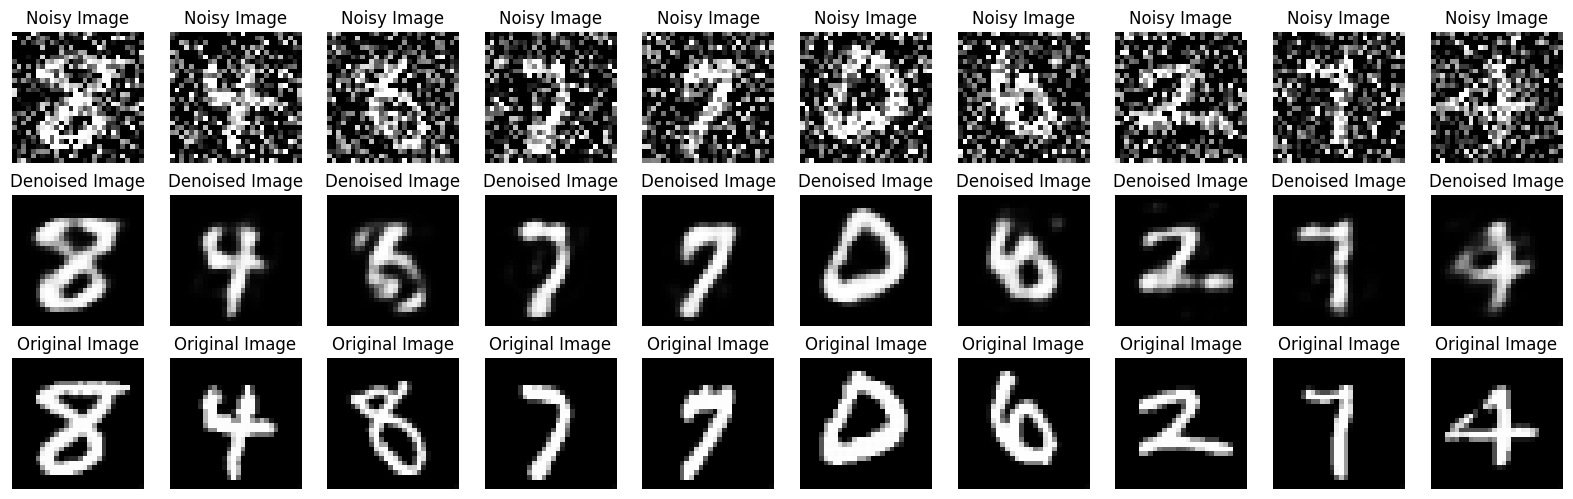

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load images from CSV file and split into training and testing sets
def load_and_split_data(file_path, test_size=0.2):
    # Load CSV file into a DataFrame, assuming the first column is a label or index
    data = pd.read_csv(file_path)
    
    # Drop the first column if it's not part of the image pixels
    data = data.iloc[:, 1:]  # This removes the first column
    
    # Convert to numpy array and normalize to [0,1]
    images = data.values.astype('float32') / 255.0
    
    # Split into training and testing sets
    x_train, x_test = train_test_split(images, test_size=test_size, random_state=42)
    return x_train, x_test

# Define path to your CSV file
data_csv = r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\3 MNIST\mnist_784_csv.csv"

# Load and preprocess data, splitting it into train and test sets
x_train, x_test = load_and_split_data(data_csv)

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Parameters
input_dim = 784  # 28x28 images flattened
encoding_dim = 64  # Size of encoding

# Input layer
input_img = Input(shape=(input_dim,))

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Make predictions
denoised_imgs = autoencoder.predict(x_test_noisy)

# Plotting original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

plt.show()
